Keys in umist: dict_keys(['__header__', '__version__', '__globals__', 'facedat', 'dirnames'])
Shape of umist_images: (1, 20)
Shape of umist_labels: (1, 20)

Person 0:		(112, 92, 38), image dim: (112, 92), images: 38, Label: 1a
Person 1:		(112, 92, 35), image dim: (112, 92), images: 35, Label: 1b
Person 2:		(112, 92, 26), image dim: (112, 92), images: 26, Label: 1c
Person 3:		(112, 92, 24), image dim: (112, 92), images: 24, Label: 1d
Person 4:		(112, 92, 26), image dim: (112, 92), images: 26, Label: 1e
Person 5:		(112, 92, 23), image dim: (112, 92), images: 23, Label: 1f
Person 6:		(112, 92, 19), image dim: (112, 92), images: 19, Label: 1g
Person 7:		(112, 92, 22), image dim: (112, 92), images: 22, Label: 1h
Person 8:		(112, 92, 20), image dim: (112, 92), images: 20, Label: 1i
Person 9:		(112, 92, 32), image dim: (112, 92), images: 32, Label: 1j
Person 10:		(112, 92, 34), image dim: (112, 92), images: 34, Label: 1k
Person 11:		(112, 92, 34), image dim: (112, 92), images: 34, Label: 1l
P

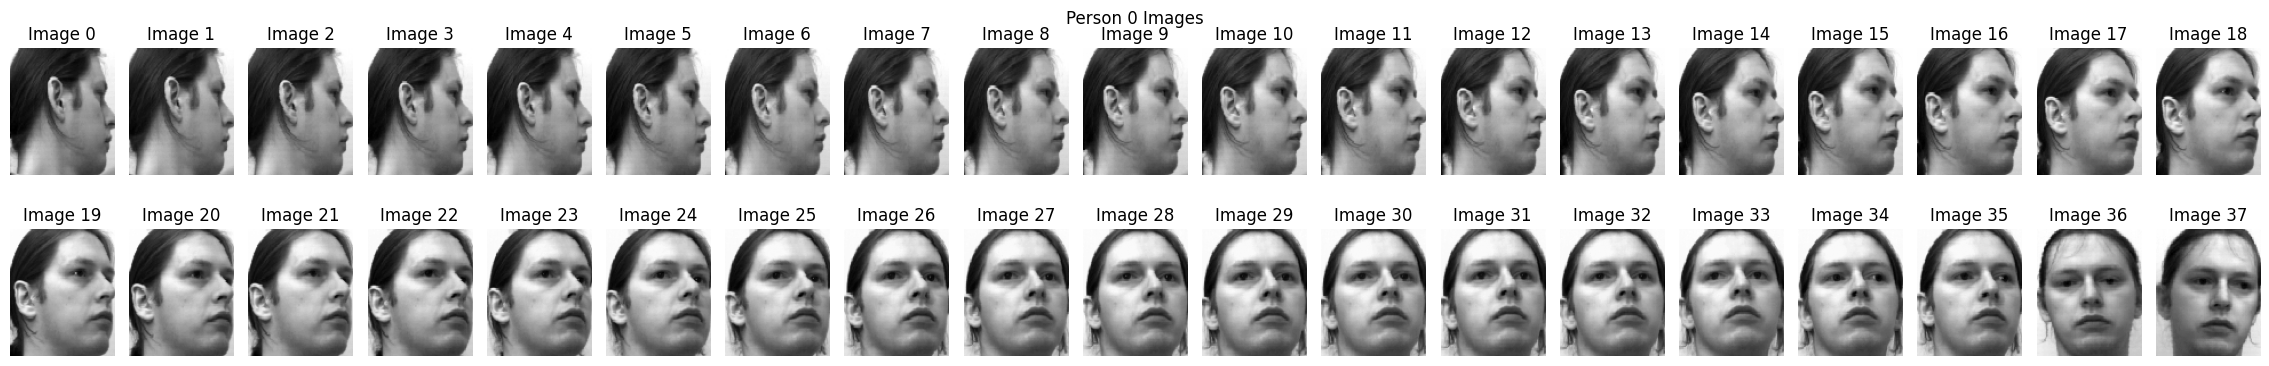

Images shape: (575, 10304)
Labels shape: (575,)
DataFrame shape: (575, 10305)


,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,label
0,233,234,234,233,234,232,232,168,99,78,...,154,151,147,143,140,141,141,140,136,1a
1,234,234,234,234,233,232,202,98,79,77,...,154,150,147,141,140,137,138,137,137,1a
2,234,234,234,234,233,230,225,109,85,84,...,174,168,164,157,152,151,148,145,145,1a
3,234,234,234,234,234,234,234,232,229,205,...,168,162,157,155,150,144,144,142,143,1a
4,234,234,234,234,234,234,234,234,229,211,...,176,170,164,162,157,152,150,148,148,1a


In [ ]:
"""
Data Preparation
"""
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Loads dataset and splits images & labels
umist = loadmat('../data/umist_data.mat')
umist_images = umist['facedat']
umist_labels = umist['dirnames']

# Prints out keys of dataset and shape of images & labels
print(f"Keys in umist: {umist.keys()}")
print(f"Shape of umist_images: {umist_images.shape}")
print(f"Shape of umist_labels: {umist_labels.shape}\n")

# Prints out person's shape, image dimensions, number of images, and corresponding label
for i in range(0, len(umist_images[0])):
  print(f"Person {i}:\t\t{umist_images[0][i].shape}, image dim: {umist_images[0][i].shape[:2]}, images: {umist_images[0][i].shape[2]}, Label: {umist_labels[0][i][0]}")


# Stores person 0's images
person_0_images = umist_images[0][0]

# Calculates the number of images per row
images_per_row = person_0_images.shape[2]//2
# Calculates the number of rows needed
num_images = person_0_images.shape[2]
num_rows = (num_images + images_per_row - 1) // images_per_row

# Sets figure size
plt.figure(figsize=(images_per_row * 1.2, num_rows * 2))

# Plots person 0's images
for i in range(num_images):
  plt.subplot(num_rows, images_per_row, i + 1)
  plt.imshow(person_0_images[:, :, i], cmap='gray')
  plt.axis('off')
  plt.title(f"Image {i}")
plt.tight_layout()
plt.suptitle("Person 0 Images")
plt.show()

# Load dataset into a Pandas dataframe with umist_labels
images = []
labels = []
# Iterate through each person
for i in range(umist_images[0].shape[0]):
  # Store persons image
  person_images = umist_images[0][i]
  # Store corresponding label to person
  person_label = umist_labels[0][i][0]

  # Iterate through each image
  num_images = person_images.shape[2]
  for j in range(num_images):
    image = person_images[:, :, j]
    # Flatten it
    flattened_image = image.flatten()
    # Append image to images
    images.append(flattened_image)
    # Append label to labels
    labels.append(person_label)


# Prints out shape of images and labels
print(f"Images shape: {np.array(images).shape}")
print(f"Labels shape: {np.array(labels).shape}")

# Construct a dataframe with images and labels
df_umist = pd.DataFrame(images)
df_umist['label'] = labels

print(f"DataFrame shape: {df_umist.shape}")
display(df_umist.head())

=== Size and shape of dataset and test/train/val sets ===
X (images) dataset shape: (575, 10304)
y (labels) dataset shape: (575,)
X_train: (191, 10304) y_train: (191,)
X_test: (192, 10304) y_test: (192,)
X_val: (192, 10304) y_val: (192,)


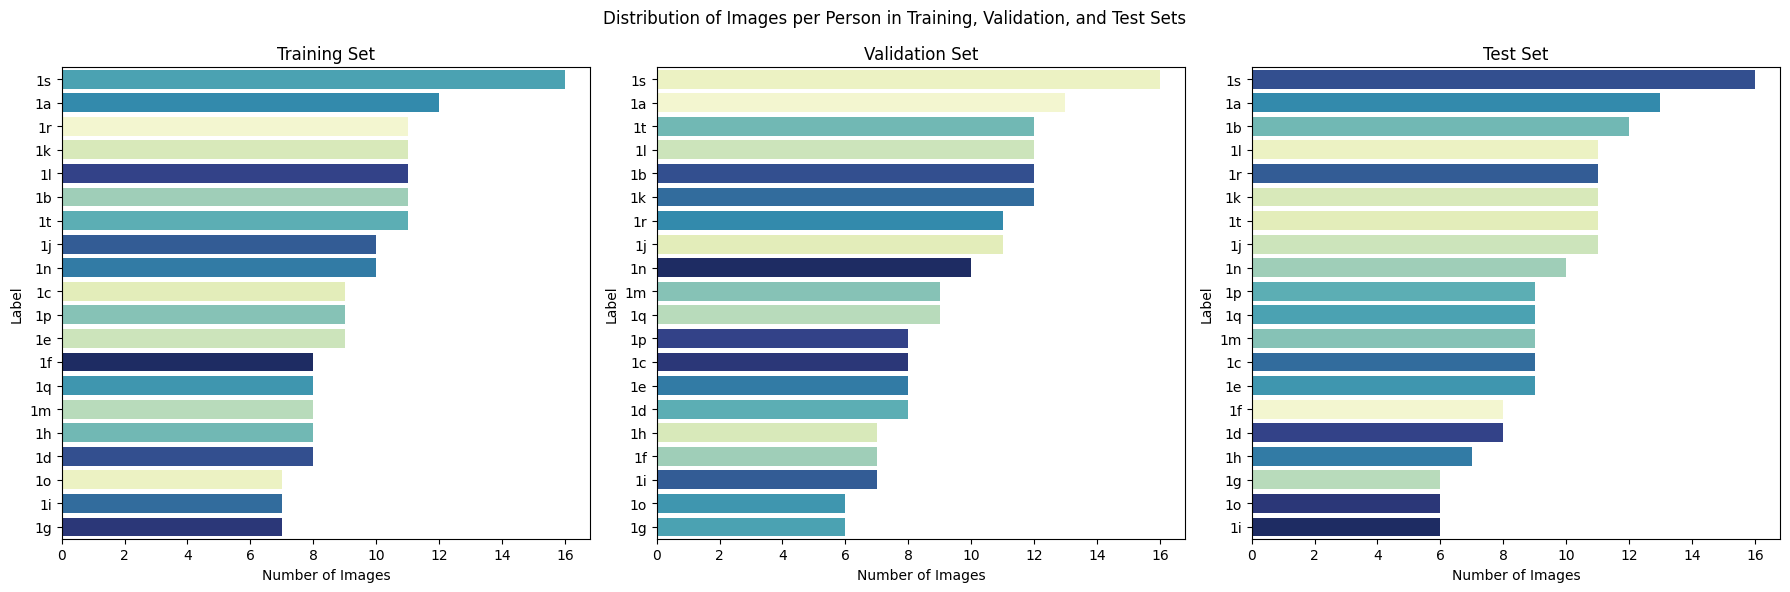

In [ ]:
"""
Data Splitting
"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training, validation, and test sets using stratified sampling
X_semaj = df_umist.drop('label', axis=1)
y_semaj = df_umist['label']

# Splits into train and test with a 66.7-33.3 split using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_semaj, y_semaj, test_size=0.333, random_state=42, stratify=y_semaj)
# Splits into train and val with a 50-50 split using stratified sampling
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42, stratify=y_train)

# Shows size and shape of dataset and test/train/val sets
print("=== Size and shape of dataset and test/train/val sets ===")
print(f"X (images) dataset shape: {X_semaj.shape}")
print(f"y (labels) dataset shape: {y_semaj.shape}")
print(f"X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"X_test: {X_test.shape} y_test: {y_test.shape}")
print(f"X_val: {X_val.shape} y_val: {y_val.shape}")

# Apply normalization on the training data
normalizer = Normalizer()
X_train_norm = normalizer.fit_transform(X_train)

# Use the fitted scaler to transform the validation and test sets
scaler = MinMaxScaler()
scaler.fit(X_train)
X_val_scale = scaler.transform(X_val)
X_test_scale = scaler.transform(X_test)

# Plotting the distribution of images per person in each subset
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Distribution of Images per Person in Training, Validation, and Test Sets')

# Distribution for Training Set
sns.countplot(y=y_train, ax=axes[0], palette='YlGnBu', hue=y_train, order=y_train.value_counts().index, legend=False)
axes[0].set_title('Training Set')
axes[0].set_xlabel('Number of Images')
axes[0].set_ylabel('Label')

# Distribution for Validation Set
sns.countplot(y=y_val, ax=axes[1], palette='YlGnBu', hue=y_val, order=y_val.value_counts().index, legend=False)
axes[1].set_title('Validation Set')
axes[1].set_xlabel('Number of Images')
axes[1].set_ylabel('Label')

# Distribution for Test Set
sns.countplot(y=y_test, ax=axes[2], palette='YlGnBu', hue=y_test, order=y_test.value_counts().index, legend=False)
axes[2].set_title('Test Set')
axes[2].set_xlabel('Number of Images')
axes[2].set_ylabel('Label')

plt.tight_layout()
plt.show()

=== PCA with 10 components ===
Original X_train: (191, 10304) Reduced X_train: (191, 10)
Original X_test: (192, 10304) Reduced X_test: (192, 10)
Original X_val: (192, 10304) Reduced X_val: (192, 10)
=== PCA with 20 components ===
Original X_train: (191, 10304) Reduced X_train: (191, 20)
Original X_test: (192, 10304) Reduced X_test: (192, 20)
Original X_val: (192, 10304) Reduced X_val: (192, 20)
=== PCA with 50 components ===
Original X_train: (191, 10304) Reduced X_train: (191, 50)
Original X_test: (192, 10304) Reduced X_test: (192, 50)
Original X_val: (192, 10304) Reduced X_val: (192, 50)
=== PCA with 100 components ===
Original X_train: (191, 10304) Reduced X_train: (191, 100)
Original X_test: (192, 10304) Reduced X_test: (192, 100)
Original X_val: (192, 10304) Reduced X_val: (192, 100)
=== PCA with 150 components ===
Original X_train: (191, 10304) Reduced X_train: (191, 150)
Original X_test: (192, 10304) Reduced X_test: (192, 150)
Original X_val: (192, 10304) Reduced X_val: (192, 15

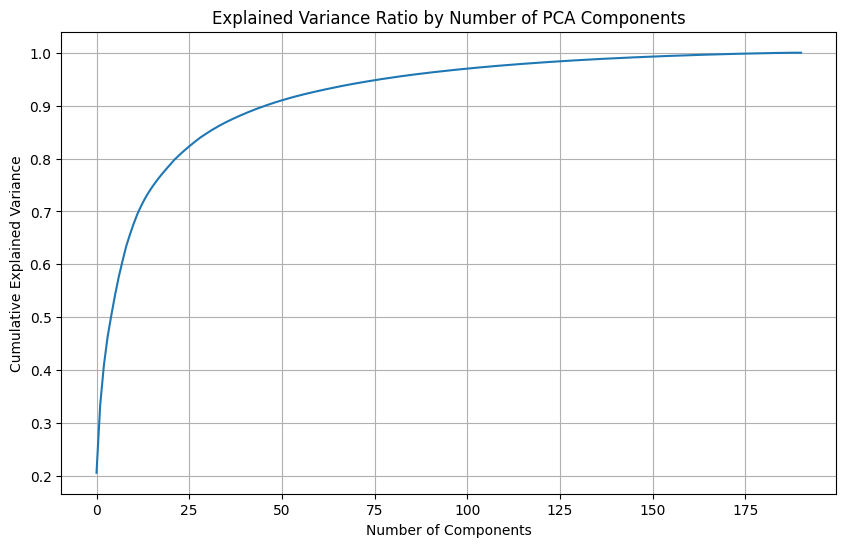

Min num of components to retain 99% of variance: 143
Original X_train: (191, 10304) Reduced X_train: (191, 143)
Original X_test: (192, 10304) Reduced X_test: (192, 143)
Original X_val: (192, 10304) Reduced X_val: (192, 143)


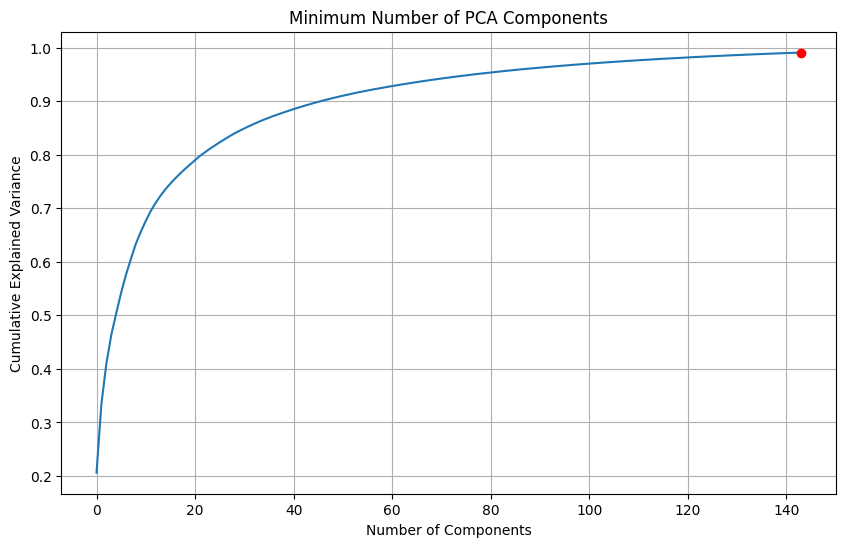

In [ ]:
"""
PCA - Dimensionality Reduction
"""
from sklearn.decomposition import PCA
num_of_components = [10, 20, 50, 100, 150]

# Try different numbers of components (e.g., 10, 20, 50, 100, 150)
for component in num_of_components:
  pca = PCA(n_components=component)
  X_train_pca = pca.fit_transform(X_train_norm)
  X_val_pca = pca.transform(X_val_scale)
  X_test_pca = pca.transform(X_test_scale)
  print(f"=== PCA with {component} components ===")
  print(f"Original X_train: {X_train.shape} Reduced X_train: {X_train_pca.shape}")
  print(f"Original X_test: {X_test.shape} Reduced X_test: {X_test_pca.shape}")
  print(f"Original X_val: {X_val.shape} Reduced X_val: {X_val_pca.shape}")

# Visualize the explained variance ratio
pca = PCA()
pca.fit(X_train_norm)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Number of PCA Components')
plt.grid(True)
plt.show()

# Use PCA to reduce the dimensionality of the dataset while retaining 99% of the variance.
pca = PCA(0.99)
pca.fit(X_train_norm)
print(f"Min num of components to retain 99% of variance: {pca.n_components_}")

# Fit PCA on the training data and transform the training, validation, and test sets accordingly.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

print(f"Original X_train: {X_train.shape} Reduced X_train: {X_train_pca.shape}")
print(f"Original X_test: {X_test.shape} Reduced X_test: {X_test_pca.shape}")
print(f"Original X_val: {X_val.shape} Reduced X_val: {X_val_pca.shape}")


# Visualize the minimum number of pca components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.n_components_, 0.99, 'o', color='red')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Minimum Number of PCA Components')
plt.grid(True)
plt.show()

In [ ]:
"""
Hierarchical Agglomerative Clustering - Clustering
"""

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define linkage methods to explore
linkage_methods = ['ward', 'complete', 'average']

# Create an empty list to store fitted models and their metrics
hierarchical_models = []
max_k = 191 # of images in X_train_pca

# Loop through each linkage method
for linkage in linkage_methods:
    print(f"\n--- Linkage method: {linkage} ---")
    # Loop through a range of cluster numbers from 10 to max_k
    for n_clusters in range(10, max_k):
        # Instantiate AgglomerativeClustering model
        if linkage == 'ward':
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric='euclidean')

        # Fit the model and predict cluster labels
        cluster_labels = model.fit_predict(X_train_pca)

        # Calculate silhouette score
        if len(np.unique(cluster_labels)) > 1 and len(np.unique(cluster_labels)) < X_train_pca.shape[0]:
            score = silhouette_score(X_train_pca, cluster_labels)
            print(f"  n_clusters: {n_clusters}, Silhouette Score: {score:.4f}")
            # Store the results
            hierarchical_models.append({'model': model, 'n_clusters': n_clusters, 'linkage': linkage, 'silhouette_score': score})
        else:
            print(f"  n_clusters: {n_clusters}, Silhouette Score: Not applicable (single or too many clusters)")



--- Linkage method: ward ---
  n_clusters: 10, Silhouette Score: 0.1323
  n_clusters: 11, Silhouette Score: 0.1425
  n_clusters: 12, Silhouette Score: 0.1487
  n_clusters: 13, Silhouette Score: 0.1478
  n_clusters: 14, Silhouette Score: 0.1534
  n_clusters: 15, Silhouette Score: 0.1549
  n_clusters: 16, Silhouette Score: 0.1616
  n_clusters: 17, Silhouette Score: 0.1643
  n_clusters: 18, Silhouette Score: 0.1725
  n_clusters: 19, Silhouette Score: 0.1798
  n_clusters: 20, Silhouette Score: 0.1878
  n_clusters: 21, Silhouette Score: 0.1880
  n_clusters: 22, Silhouette Score: 0.1939
  n_clusters: 23, Silhouette Score: 0.1985
  n_clusters: 24, Silhouette Score: 0.2028
  n_clusters: 25, Silhouette Score: 0.2079
  n_clusters: 26, Silhouette Score: 0.2063
  n_clusters: 27, Silhouette Score: 0.2115
  n_clusters: 28, Silhouette Score: 0.2181
  n_clusters: 29, Silhouette Score: 0.2207
  n_clusters: 30, Silhouette Score: 0.2233
  n_clusters: 31, Silhouette Score: 0.2279
  n_clusters: 32, Silhou

-- Best Hierarchical Model --
Linkage: ward
Number of clusters: 79
Silhouette Score: 0.3254


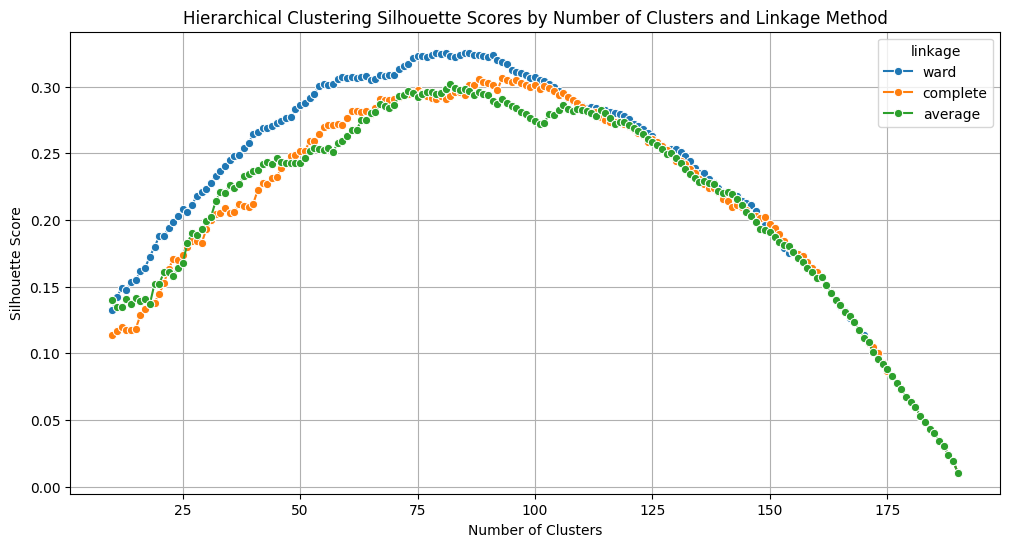

In [ ]:
# Visualizes Hierarchical Clustering Silhouette Scores by Number of Clusters and Linkage Method
import matplotlib.pyplot as plt
import pandas as pd

# Find the best performing model based on silhouette score
best_hierarchical_model = max(hierarchical_models, key=lambda x: x['silhouette_score'])

print(f"-- Best Hierarchical Model --")
print(f"Linkage: {best_hierarchical_model['linkage']}")
print(f"Number of clusters: {best_hierarchical_model['n_clusters']}")
print(f"Silhouette Score: {best_hierarchical_model['silhouette_score']:.4f}")

# Prepare data for visualization
plot_data = pd.DataFrame(hierarchical_models)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, x='n_clusters', y='silhouette_score', hue='linkage', marker='o')
plt.title('Hierarchical Clustering Silhouette Scores by Number of Clusters and Linkage Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Hierarchical Cluster Purity Scores:
  Cluster 0: 1.0000
  Cluster 1: 0.6667
  Cluster 2: 1.0000
  Cluster 3: 1.0000
  Cluster 4: 1.0000
  Cluster 5: 1.0000
  Cluster 6: 1.0000
  Cluster 7: 0.6667
  Cluster 8: 0.6667
  Cluster 9: 1.0000
  Cluster 10: 0.6000
  Cluster 11: 1.0000
  Cluster 12: 1.0000
  Cluster 13: 1.0000
  Cluster 14: 1.0000
  Cluster 15: 1.0000
  Cluster 16: 1.0000
  Cluster 17: 1.0000
  Cluster 18: 0.5000
  Cluster 19: 1.0000
  Cluster 20: 1.0000
  Cluster 21: 0.5000
  Cluster 22: 1.0000
  Cluster 23: 1.0000
  Cluster 24: 1.0000
  Cluster 25: 1.0000
  Cluster 26: 1.0000
  Cluster 27: 1.0000
  Cluster 28: 1.0000
  Cluster 29: 1.0000
  Cluster 30: 1.0000
  Cluster 31: 1.0000
  Cluster 32: 1.0000
  Cluster 33: 1.0000
  Cluster 34: 1.0000
  Cluster 35: 1.0000
  Cluster 36: 1.0000
  Cluster 37: 1.0000
  Cluster 38: 1.0000
  Cluster 39: 1.0000
  Cluster 40: 1.0000
  Cluster 41: 1.0000
  Cluster 42: 1.0000
  Cluster 43: 1.0000
  Cluster 44: 0.3333
  Cluster 45: 1.0000
  Cluste

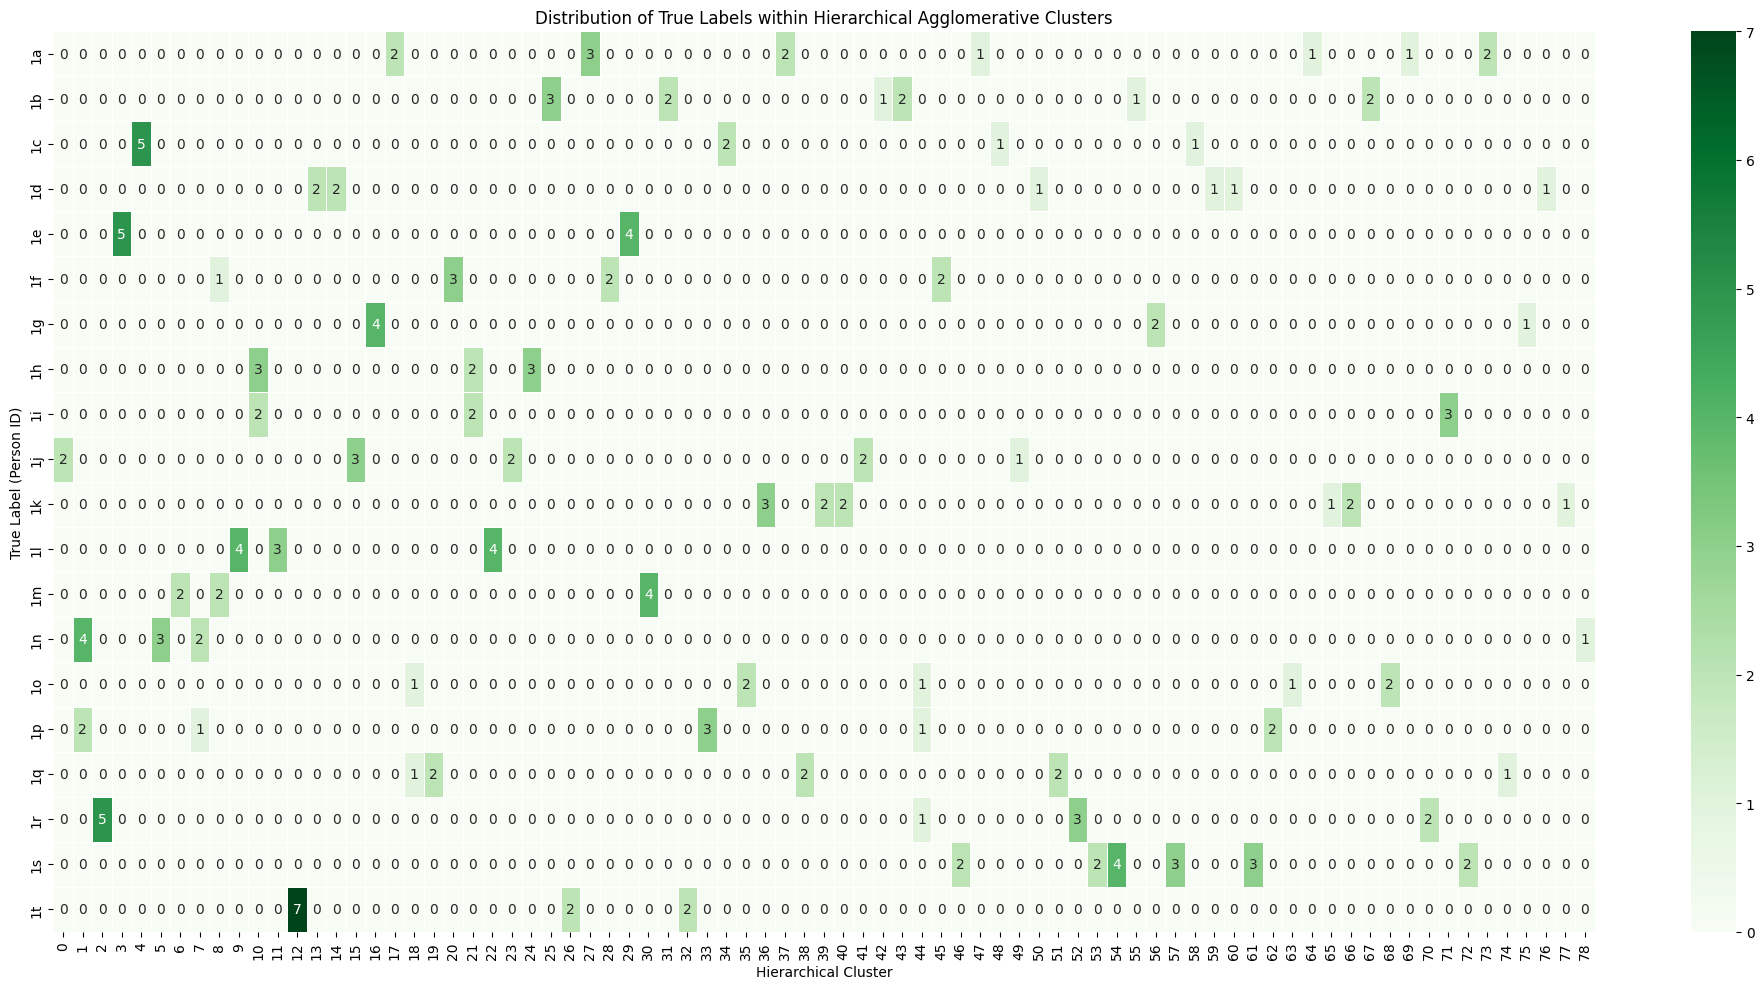

In [ ]:
# Visualize the distribution of labels within each cluster using a heatmap
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the cluster labels from the best hierarchical model
hierarchical_cluster_labels = best_hierarchical_model['model'].fit_predict(X_train_pca)

# Create a contingency matrix (cross-tabulation) of true labels vs. cluster assignments
contingency_matrix_hierarchical = pd.crosstab(y_train, hierarchical_cluster_labels, dropna=False)

# Calculate purity for each hierarchical cluster
purity_scores_hierarchical = {}
for cluster_id in contingency_matrix_hierarchical.columns:
    # Find the maximum count in the cluster (which corresponds to the most dominant class)
    max_count = contingency_matrix_hierarchical[cluster_id].max()
    # Sum of all samples in the cluster
    total_samples_in_cluster = contingency_matrix_hierarchical[cluster_id].sum()
    # Purity is the fraction of dominant class samples in the cluster
    purity = max_count / total_samples_in_cluster if total_samples_in_cluster > 0 else 0
    purity_scores_hierarchical[cluster_id] = purity

# Display purity scores
print("Hierarchical Cluster Purity Scores:")
for cluster_id, purity in purity_scores_hierarchical.items():
    print(f"  Cluster {cluster_id}: {purity:.4f}")

# Plot Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(contingency_matrix_hierarchical, cmap='Greens', annot=True, fmt='d', linewidths=.5)
plt.title('Distribution of True Labels within Hierarchical Agglomerative Clusters')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('True Label (Person ID)')
plt.tight_layout()
plt.show()


In [ ]:
"""
Prepare PCA reduced data and HAC cluster distance features for Neural Network
"""
image_height = 112
image_width = 92

# Scales X_train
X_train_scale = scaler.transform(X_train)

# Reshapes scaled values from flattened 10304 to 2D 112x92x1 for CNN
X_train_scale = X_train_scale.reshape(-1, image_height, image_width, 1)
X_val_scale   = X_val_scale.reshape(-1, image_height, image_width, 1)
X_test_scale  = X_test_scale.reshape(-1, image_height, image_width, 1)

# Converting dataset labels into numerical format and encoding to categorical for classifier
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Instantiate LabelEncoder
label_encoder = LabelEncoder()
print("LabelEncoder instantiated.")

# Transform labels to numerical
label_encoder.fit(y_train)
y_train_encoded_numerical = label_encoder.transform(y_train)
y_val_encoded_numerical = label_encoder.transform(y_val)
y_test_encoded_numerical = label_encoder.transform(y_test)

# Apply one-hot encoding
y_train_onehot = to_categorical(y_train_encoded_numerical)
y_val_onehot = to_categorical(y_val_encoded_numerical)
y_test_onehot = to_categorical(y_test_encoded_numerical)

# Determine the number of unique classes
output_dim_nn = len(np.unique(y_train_encoded_numerical))

print(f"Original y_train shape: {y_train.shape}")
print(f"Encoded numerical y_train shape: {y_train_encoded_numerical.shape}")
print(f"One-hot encoded y_train shape: {y_train_onehot.shape}")
print(f"Number of unique classes (output_dim_nn): {output_dim_nn}")

LabelEncoder instantiated.
Original y_train shape: (191,)
Encoded numerical y_train shape: (191,)
One-hot encoded y_train shape: (191, 20)
Number of unique classes (output_dim_nn): 20


In [ ]:
# Generating Hierarchical Agglomerative Clustering features
from sklearn.metrics import pairwise_distances

# Get the cluster assignments for the training data from the best hierarchical model
h_cluster_labels_train = best_hierarchical_model['model'].fit_predict(X_train_pca)

# Calculate the centroids for each cluster
# This involves grouping X_train_pca by h_cluster_labels_train and calculating the mean for each cluster
cluster_centroids = np.array([X_train_pca[h_cluster_labels_train == i].mean(axis=0)
                              for i in range(best_hierarchical_model['n_clusters'])])

# Calculate the Euclidean distance from each data point to each cluster centroid
X_train_hac_features = pairwise_distances(X_train_pca, cluster_centroids, metric='euclidean')
X_val_hac_features = pairwise_distances(X_val_pca, cluster_centroids, metric='euclidean')
X_test_hac_features = pairwise_distances(X_test_pca, cluster_centroids, metric='euclidean')

print(f"Shape of X_train_hac_features: {X_train_hac_features.shape}")
print(f"Shape of X_val_hac_features: {X_val_hac_features.shape}")
print(f"Shape of X_test_hac_features: {X_test_hac_features.shape}")

Shape of X_train_hac_features: (191, 79)
Shape of X_val_hac_features: (192, 79)
Shape of X_test_hac_features: (192, 79)


In [ ]:
# Combines PCA reduced data and HAC cluster distance features horizontally
X_train_nn_input = np.concatenate((X_train_pca, X_train_hac_features), axis=1)
X_val_nn_input = np.concatenate((X_val_pca, X_val_hac_features), axis=1)
X_test_nn_input = np.concatenate((X_test_pca, X_test_hac_features), axis=1)

# Prints the shapes of combined data
print(f"Shape of X_train_nn_input: {X_train_nn_input.shape}")
print(f"Shape of X_val_nn_input: {X_val_nn_input.shape}")
print(f"Shape of X_test_nn_input: {X_test_nn_input.shape}")

Shape of X_train_nn_input: (191, 222)
Shape of X_val_nn_input: (192, 222)
Shape of X_test_nn_input: (192, 222)


In [ ]:
"""
Define Hybrid CNN-ANN Model Architecture
"""

from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from keras.models import Model
import numpy as np

# Define input for image branch
input_img = Input(shape=(image_height, image_width, 1), name='image_input')

# Image processing branch (CNN)
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
flattened_cnn_output = Flatten()(x)

# Define input for PCA/HAC features branch
input_features = Input(shape=(X_train_nn_input.shape[1],), name='features_input')

# Feature processing branch (ANN)
y = Dense(128, activation='relu')(input_features)
y = Dense(64, activation='relu')(y)

# Concatenate the outputs of the two branches
combined = concatenate([flattened_cnn_output, y])

# Final classification layers
z = Dense(128, activation='relu')(combined)
z = Dense(64, activation='relu')(z)

# Output layer
output_layer = Dense(output_dim_nn, activation='softmax')(z)

# Create the hybrid model
hybrid_model = Model(inputs=[input_img, input_features], outputs=output_layer)

hybrid_model.summary()

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 112, 92,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 112, 92,   │        320 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 56, 46,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 56, 46,    │     18,496 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 28, 23,    │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ features_input      │ (None, 222)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 28, 23,    │     73,856 │ max_pooling2d_17… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 128)       │     28,544 │ features_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 82432)     │          0 │ conv2d_24[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 64)        │      8,256 │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 82496)     │          0 │ flatten_5[0][0],  │
│ (Concatenate)       │                   │            │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 128)       │ 10,559,616 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 64)        │      8,256 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 20)        │      1,300 │ dense_25[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,698,644 (40.81 MB)

 Trainable params: 10,698,644 (40.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras

# Compile the model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = hybrid_model.fit(
    {'image_input': X_train_scale, 'features_input': X_train_nn_input},
    y_train_onehot,
    epochs=20,
    batch_size=32,
    validation_data=({'image_input': X_val_scale, 'features_input': X_val_nn_input}, y_val_onehot)
)

print("Hybrid CNN-ANN model compiled and trained successfully.")

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0796 - loss: 63.2487 - val_accuracy: 0.0417 - val_loss: 32.0288
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0463 - loss: 27.6365 - val_accuracy: 0.0573 - val_loss: 11.4739
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.0520 - loss: 10.0453 - val_accuracy: 0.1042 - val_loss: 4.8811
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1122 - loss: 4.5466 - val_accuracy: 0.2188 - val_loss: 3.1360
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 928ms/step - accuracy: 0.2110 - loss: 2.6788 - val_accuracy: 0.2969 - val_loss: 2.6037
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 981ms/step - accuracy: 0.3557 - loss: 2.0965 - val_accuracy: 0.3646 - val_loss: 2.1080
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 975ms/step - accuracy: 0.5037 - loss: 1.5572 - val_accuracy: 0.4688 - val_loss: 1.6914
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 989ms/step - accuracy: 0.6591 - loss: 1.2531 - val_accuracy: 0.6250 - val_loss: 1

Test Loss: 0.2234
Test Accuracy: 0.9323
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step


<Figure size 1200x1000 with 0 Axes>

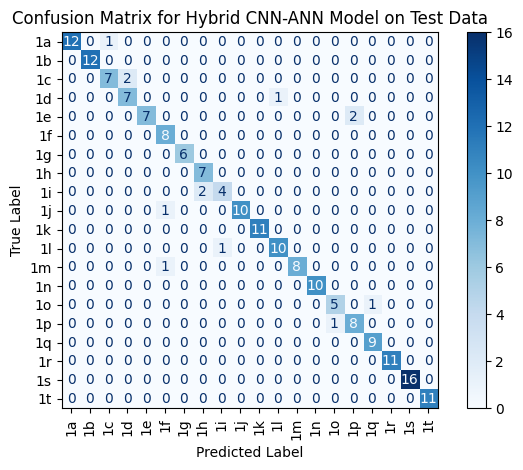

In [ ]:
# Plots confusion matrix for model on test data
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model on the test data
loss, accuracy = hybrid_model.evaluate(
    {'image_input': X_test_scale, 'features_input': X_test_nn_input},
    y_test_onehot,
    verbose=0
)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred_probabilities = hybrid_model.predict(
    {'image_input': X_test_scale, 'features_input': X_test_nn_input}
)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded true labels back to numerical labels
y_test_numerical = np.argmax(y_test_onehot, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred_classes)

# Get class names from the label_encoder
class_names = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Hybrid CNN-ANN Model on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


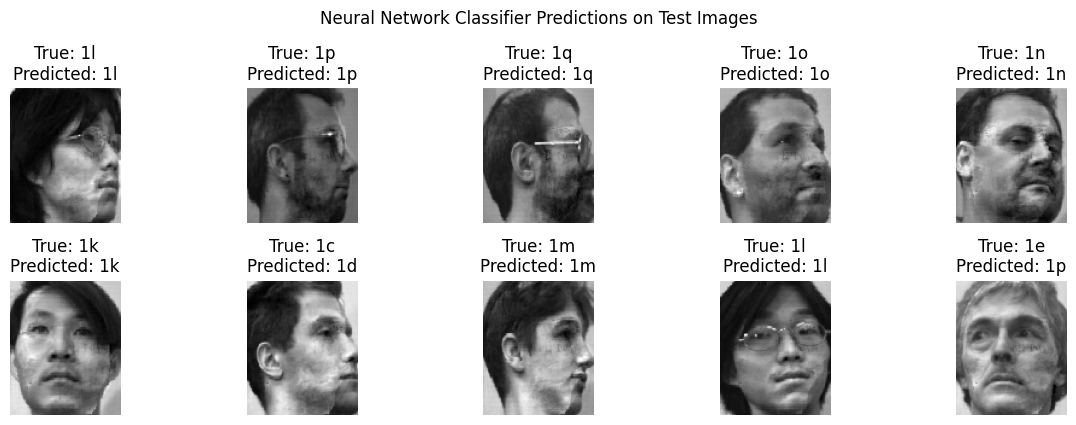

In [ ]:
# Display a few sample test images with both true and predicted labels.
import random
import matplotlib.pyplot as plt
import numpy as np

num_images = 10

# Randomly selects indices for plotting
random_indices = random.sample(range(len(X_test_scale)), num_images)

# Sets plot size
rows = 2
cols = 5
plt.figure(figsize=(num_images/rows * 2.5, num_images/cols * 2))

for i, idx in enumerate(random_indices):
    # Gets the image, true label, and predicted label
    image = X_test_scale[idx]
    true_label_numerical = y_test_numerical[idx]
    predicted_label_numerical = y_pred_classes[idx]

    # Converts numerical labels back to original string labels
    true_label = label_encoder.inverse_transform([true_label_numerical])[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_numerical])[0]

    # Reshape image for plotting
    image_2d = image.reshape(image_height, image_width)

    # Plots image with true and predicted label
    plt.subplot(rows, cols, i + 1)
    plt.imshow(image_2d, cmap='gray')
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Neural Network Classifier Predictions on Test Images", y=1.05)
plt.show()